# Agent Based Models

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')

Downloaded utils.py
Downloaded Cell2D.py


In [3]:
from utils import decorate, savefig
# make a directory for figures
!mkdir -p figs

In [4]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.5-py3-none-any.whl size=12467 sha256=e4d9ba1ebd77b553dc13d9218454421acc364da120d767ca0c1f16ecfab9eb2f
  Stored in directory: /root/.cache/pip/wheels/0d/d0/ae/1ad4c7593703e55b2321b23b49d3b0d55261b59d7036d7045b
Successfully built empiricaldist


# Schelling's model

`locs_where` is a wrapper on `np.nonzero` that returns results as a list of tuples.

[`np.nonzero`](https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html): return the indices of the elements that are non-zero. Returns a tuple of arrays, one for each dimension of a, containing the indices of the non-zero elements in that dimension. The values in a are always tested and returned in row-major, C-style order.

In [5]:
def locs_where(condition):
    """Find cells where a logical array is True.

    condition: logical array

    returns: list of location tuples (identified by the row/column indices)
    """
    return list(zip(*np.nonzero(condition)))

More explanations for `loc_where`

In [6]:
import numpy as np
x = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 0]])
print(x)

[[3 0 0]
 [0 4 0]
 [5 6 0]]


In [7]:
print(np.nonzero(x))

(array([0, 1, 2, 2]), array([0, 1, 0, 1]))


In [8]:
print(list(zip(*np.nonzero(x))))

[(0, 0), (1, 1), (2, 0), (2, 1)]


**Implementation of Schelling's model:**

In [9]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# make a custom color map
palette = sns.color_palette('muted')
colors = 'white', palette[1], palette[0]
cmap = LinearSegmentedColormap.from_list('cmap', colors)

Some numpy documentations you may want to check:

[`numpy.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

[`numpy.random.shuffle`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html)

[`numpy.random.randint`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

[`numpy.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

[`numpy.sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

[`numpy.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html)

In [10]:
n = 10
choices = np.array([0, 1, 2], dtype=np.int8)
probs = [0.1, 0.45, 0.45]
test_array = np.random.choice(choices, (n, n), p=probs)

In [11]:
test_array

array([[1, 2, 2, 1, 1, 2, 2, 2, 1, 1],
       [2, 1, 1, 2, 2, 2, 1, 1, 2, 2],
       [1, 1, 1, 2, 1, 1, 1, 1, 1, 1],
       [1, 1, 2, 1, 1, 1, 1, 2, 2, 1],
       [2, 2, 1, 2, 1, 2, 1, 2, 1, 1],
       [1, 2, 2, 2, 0, 0, 1, 1, 1, 1],
       [2, 1, 2, 0, 1, 2, 1, 1, 2, 2],
       [1, 1, 1, 2, 1, 2, 1, 0, 2, 2],
       [1, 2, 1, 1, 2, 1, 2, 1, 1, 2],
       [2, 2, 2, 0, 2, 1, 2, 1, 0, 1]], dtype=int8)

In [12]:
empty = test_array==0
red = test_array==1
blue = test_array==2

In [13]:
empty.astype('uint8')

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0]], dtype=uint8)

In [14]:
red.astype('uint8')

array([[1, 0, 0, 1, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1]], dtype=uint8)

In [16]:
from scipy.signal import correlate2d

options = dict(mode='same', boundary='wrap')
kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]], dtype=np.int8)

correlate2d(red, kernel, **options)

array([[3, 3, 3, 2, 2, 3, 4, 4, 4, 3],
       [6, 5, 4, 5, 4, 5, 4, 5, 6, 6],
       [6, 6, 5, 5, 4, 6, 6, 5, 4, 4],
       [6, 5, 5, 5, 5, 7, 5, 6, 6, 6],
       [6, 4, 2, 4, 3, 6, 4, 6, 5, 6],
       [3, 3, 2, 3, 2, 5, 4, 6, 5, 4],
       [5, 4, 3, 3, 1, 5, 4, 5, 4, 4],
       [3, 5, 4, 5, 3, 5, 4, 5, 3, 3],
       [3, 5, 3, 3, 4, 3, 5, 3, 3, 4],
       [4, 3, 3, 4, 5, 2, 4, 3, 6, 5]], dtype=int8)

In [17]:
from scipy.signal import correlate2d
from Cell2D import Cell2D, draw_array

class Schelling(Cell2D):
    """Represents a grid of Schelling agents."""

    options = dict(mode='same', boundary='wrap')

    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]], dtype=np.int8)

    def __init__(self, n, p):
        """Initializes the attributes.

        n: number of rows -- size of the grid
        p: threshold on the fraction of similar neighbors
        """
        self.p = p
        # 0 is empty house, 1 is agent labelled red, 2 is agent labelled blue
        choices = np.array([0, 1, 2], dtype=np.int8)
        probs = [0.1, 0.45, 0.45]

        # randomly initialize a grid of houses of n by, occupied by two kinds of agents (red and blue)
        # in roughly equal numbers. About 10% of the houses are empty.
        # in [0, 1, 2], o has 10% to be chosen, 1 and 2 each has 45% to be chosen.
        self.array = np.random.choice(choices, (n, n), p=probs)


    def count_neighbors(self):
        """Surveys neighboring cells.

        returns: tuple of
            empty: True where cells are empty
            frac_red: fraction of red neighbors around each cell
            frac_blue: fraction of blue neighbors around each cell
            frac_same: fraction of neighbors with the same color
        """
        a = self.array

        # create three arrays that contain False/True (0/1) values
        # to later count the different type of neighbours separately
        empty = a==0
        red = a==1
        blue = a==2

        # correlate with the kernel, considering the 8 surronding neighbours
        # for agent labelled by red, count how many neighbours are also red agents
        # for agent labelled by blue, count how many neigbours are also blue neighbours
        num_red = correlate2d(red, self.kernel, **self.options)
        num_blue = correlate2d(blue, self.kernel, **self.options)
        # for each aget, count the total neighbours (no matter blue or red) it has
        num_neighbors = num_red + num_blue

        # compute fraction of similar neighbors
        frac_red = num_red / num_neighbors
        frac_blue = num_blue / num_neighbors

        # no neighbors is considered the same as no similar neighbors
        # (this is an arbitrary choice for a rare event)
        frac_red[num_neighbors == 0] = 0
        frac_blue[num_neighbors == 0] = 0

        # for each cell, fill the fraction of neighbors with the same color
        # wherever red is True, frac_same gets the corresponding element of frac_red.
        # where red is False, frac_same gets the corresponding element of frac_blue.
        frac_same = np.where(red, frac_red, frac_blue)

        # where red is False could be either blue or empty
        # thus, one additional step:
        # for empty cells, frac_same is NaN
        frac_same[empty] = np.nan

        return empty, frac_red, frac_blue, frac_same

    def segregation(self):
        """Computes the average fraction of similar neighbors.

        returns: fraction of similar neighbors, averaged over cells
        """
        # For quantitative analysis of segregation
        _, _, _, frac_same = self.count_neighbors()
        return np.nanmean(frac_same)

    def step(self):
        """Executes one time step.

        returns: fraction of similar neighbors, averaged over cells
        """
        a = self.array
        empty, _, _, frac_same = self.count_neighbors()

        # find the unhappy cells (ignore NaN in frac_same)
        with np.errstate(invalid='ignore'):
            unhappy = frac_same < self.p # an agent will be unhappy if fewer than p of their neighbors are the same color.
        unhappy_locs = locs_where(unhappy) # return list of (row, column) index tuples to specify the unhappy location

        # find the empty cells: the list of (row, column) index tuples for empty location
        empty_locs = locs_where(empty)

        # shuffle the unhappy cells
        if len(unhappy_locs):
            np.random.shuffle(unhappy_locs)

        # for each unhappy cell, choose a random destination
        num_empty = np.sum(empty)

        for source in unhappy_locs:
            i = np.random.randint(num_empty)
            dest = empty_locs[i]

            # move
            a[dest] = a[source] # unhappy agent moves to the empty location, state value updates from 0 to 1 or 2
            a[source] = 0 # the unhappy agent's location becomes empty after it moves away
            empty_locs[i] = source # update the empty location list to include the location of unhappy agent that just moved away

            # check that the number of empty cells remains the same
            num_empty2 = np.sum(a==0)
            assert num_empty == num_empty2

        # return the average fraction of similar neighbors
        return np.nanmean(frac_same)

    def draw(self):
        """Draws the cells."""
        return draw_array(self.array, cmap=cmap, vmax=2)

Here's a small example.

0.5137608806963646

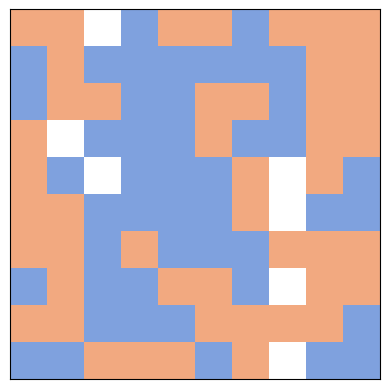

In [18]:
grid = Schelling(n=10, p=0.3)
grid.draw()
grid.segregation() # initial average degree of segregation

And here's an animation for a bigger example after 30 steps:



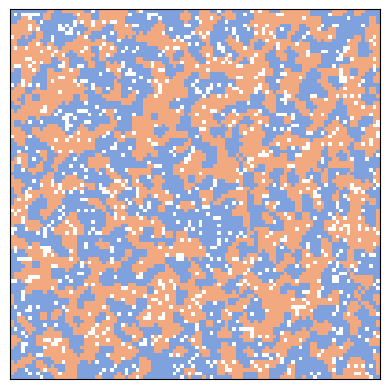

In [19]:
grid = Schelling(n=100, p=0.3)
grid.animate(frames=30, interval=0.1)

The degree of segregation increases quickly.

The following figure shows the process after 2 and 10 steps.

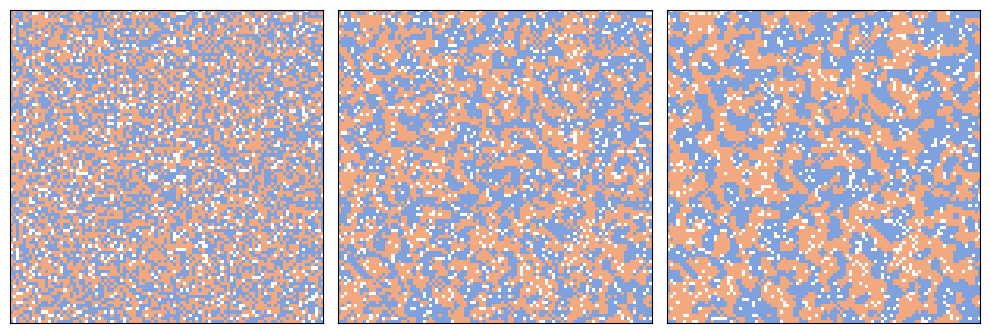

In [20]:
from utils import three_frame

grid = Schelling(n=100, p=0.3)
three_frame(grid, [0, 2, 8])


And here's how segregation in steady state relates to `p`, the threshold on the fraction of similar neighbors.

Degree of segregation: the average, across agents, of the fraction of neighbors who are the same color as the agent

0.5 0.8707797990077598
0.4 0.8181252110773387
0.3 0.7538847395404771
0.2 0.5729593164353953


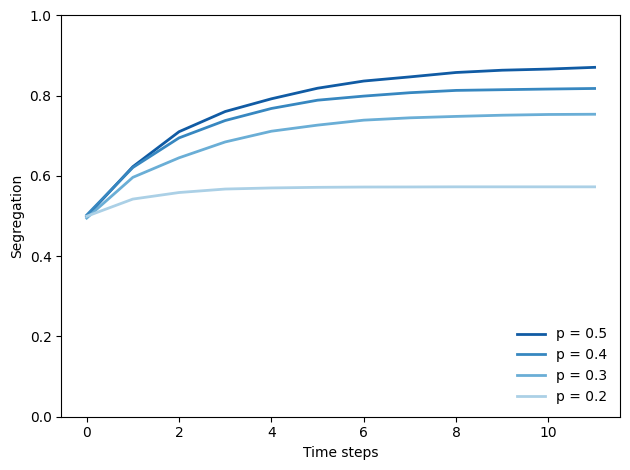

In [21]:
from utils import set_palette
set_palette('Blues', 5, reverse=True)

np.random.seed(17)
for p in [0.5, 0.4, 0.3, 0.2]:
    grid = Schelling(n=100, p=p)
    segs = [grid.step() for i in range(12)]
    plt.plot(segs, label='p = %.1f' % p)
    print(p, segs[-1])

decorate(xlabel='Time steps', ylabel='Segregation',
                loc='lower right', ylim=[0, 1])


At `p=0.3`, there is a striking difference between the level that would make people happy, at only 30%, and the level they actually get, around 75%.

# Sugarscape

`make_locs` takes the dimensions of the grid and returns an array where each row is a coordinate in the grid.

In [22]:
def make_locs(n, m):
    """Makes array where each row is an index in an `n` by `m` grid.

    n: int number of rows
    m: int number of cols

    returns: NumPy array
    """
    t = [(i, j) for i in range(n) for j in range(m)]
    return np.array(t)

In [23]:
# For example, returning the locations of each cell in a grid of 2 rows and 3 columns.

make_locs(2, 3)

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 0],
       [1, 1],
       [1, 2]])

`make_visible_locs` takes the range of an agents vision and returns an array where each row is the coordinate of a visible cell.

The cells are at increasing distances.  The cells at each distance are shuffled.

In [24]:
def make_visible_locs(vision):
    """Computes the kernel of visible cells.

    vision: int distance
    """
    def make_array(d):
        """Generates visible cells with increasing distance."""
        a = np.array([[-d, 0], [d, 0], [0, -d], [0, d]])
        np.random.shuffle(a)
        return a

    arrays = [make_array(d) for d in range(1, vision+1)]
    return np.vstack(arrays)

In [25]:
make_visible_locs(2)

array([[ 0,  1],
       [ 1,  0],
       [ 0, -1],
       [-1,  0],
       [ 0, -2],
       [-2,  0],
       [ 0,  2],
       [ 2,  0]])

`distances_from` returns an array that contains the distance of each cell from the given coordinates.

[`numpy.indices`](https://numpy.org/doc/stable/reference/generated/numpy.indices.html): return an array representing the indices of a grid.

[`numpy.hypot`](https://numpy.org/doc/stable/reference/generated/numpy.hypot.html): given the “legs” of a right triangle, return its hypotenuse. Returned result equivalents to `sqrt(x1**2 + x2**2)`

In [26]:
def distances_from(n, i, j):
    """Computes an array of distances.

    n: size of the array
    i, j: coordinates to find distance from

    returns: array of float
    """
    X, Y = np.indices((n, n))
    # print these out for better understanding
    # print(X)
    # print(Y)
    # print(X-i)
    # print(Y-j)
    return np.hypot(X-i, Y-j)

In [27]:
dist = distances_from(5, 2, 2)
dist

array([[2.82842712, 2.23606798, 2.        , 2.23606798, 2.82842712],
       [2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798],
       [2.        , 1.        , 0.        , 1.        , 2.        ],
       [2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798],
       [2.82842712, 2.23606798, 2.        , 2.23606798, 2.82842712]])

`np.digitize` is used to set the capacity in each cell according to the distance from the peak.  Here's an example that shows how it works.

[`numpy.digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html): return the indices of the bins to which each value in input array belongs.

when `numpy.digitize(x, bins, right=False)`, and the bin is in decreasing order, returned index `i` satisfies `bins[i-1] > x >= bins[i]`




In [28]:
bins = [3, 2, 1, 0]
np.digitize(dist, bins)

# the center surrounded by concentric rings with smaller values.

array([[1, 1, 1, 1, 1],
       [1, 2, 2, 2, 1],
       [1, 2, 3, 2, 1],
       [1, 2, 2, 2, 1],
       [1, 1, 1, 1, 1]])

If we set two peaks in this example:


In [29]:
distances_from(5, 1, 1)

array([[1.41421356, 1.        , 1.41421356, 2.23606798, 3.16227766],
       [1.        , 0.        , 1.        , 2.        , 3.        ],
       [1.41421356, 1.        , 1.41421356, 2.23606798, 3.16227766],
       [2.23606798, 2.        , 2.23606798, 2.82842712, 3.60555128],
       [3.16227766, 3.        , 3.16227766, 3.60555128, 4.24264069]])

In [30]:
distances_from(5, 3, 3)

array([[4.24264069, 3.60555128, 3.16227766, 3.        , 3.16227766],
       [3.60555128, 2.82842712, 2.23606798, 2.        , 2.23606798],
       [3.16227766, 2.23606798, 1.41421356, 1.        , 1.41421356],
       [3.        , 2.        , 1.        , 0.        , 1.        ],
       [3.16227766, 2.23606798, 1.41421356, 1.        , 1.41421356]])

In [31]:
dist = np.minimum(distances_from(5, 1, 1), distances_from(5, 3, 3))
dist

array([[1.41421356, 1.        , 1.41421356, 2.23606798, 3.16227766],
       [1.        , 0.        , 1.        , 2.        , 2.23606798],
       [1.41421356, 1.        , 1.41421356, 1.        , 1.41421356],
       [2.23606798, 2.        , 1.        , 0.        , 1.        ],
       [3.16227766, 2.23606798, 1.41421356, 1.        , 1.41421356]])

In [32]:
bins = [3, 2, 1, 0]
np.digitize(dist, bins)

array([[2, 2, 2, 1, 0],
       [2, 3, 2, 1, 1],
       [2, 2, 2, 2, 2],
       [1, 1, 2, 3, 2],
       [0, 1, 2, 2, 2]])

```
The special syntax **kwargs in function definitions in Python is used to pass a keyworded, variable-length argument list.

*   A keyword argument is where you provide a name to the variable as you pass it into the function.
*   One can think of the kwargs as being a dictionary that maps each keyword to the value that we pass alongside it. That is why when we iterate over the kwargs there doesn’t seem to be any order in which they were printed out.
```




Here's the implementation of Sugarscape:

In [33]:
class Sugarscape(Cell2D):
    """Represents an Epstein-Axtell Sugarscape."""

    def __init__(self, n, **params):
        """Initializes the attributes.

        n: number of rows and columns
        params: dictionary of parameters
        """
        self.n = n
        self.params = params # a dictionary where parameters are saved.

        # track variables
        self.agent_count_seq = []

        # make the capacity array
        self.capacity = self.make_capacity()

        # initially all cells are at capacity
        self.array = self.capacity.copy()

        # make the agents
        self.make_agents()

    def make_capacity(self):
        """Makes the capacity array."""

        # compute the distance of each cell from the peaks.
        dist1 = distances_from(self.n, 15, 15)
        dist2 = distances_from(self.n, 35, 35)
        dist = np.minimum(dist1, dist2)

        # cells in the capacity array are set according to dist from peak
        bins = [21, 16, 11, 6]
        a = np.digitize(dist, bins)
        return a

    def make_agents(self):
        """Makes the agents."""

        # determine where the agents start and generate locations
        n, m = self.params.get('starting_box', self.array.shape)
        locs = make_locs(n, m) # return the locations of each cell in a grid by indices of row and column
        np.random.shuffle(locs)

        # make the agents
        num_agents = self.params.get('num_agents', 400)
        assert(num_agents <= len(locs))
        # make a list of agents, with each has its own associated attributes: sugar, vision, metabolism etc.
        self.agents = [Agent(locs[i], self.params)
                       for i in range(num_agents)]

        # keep track of which cells are occupied
        self.occupied = set(agent.loc for agent in self.agents)

    def grow(self):
        """Adds sugar to all cells and caps them by capacity."""
        grow_rate = self.params.get('grow_rate', 1)
        self.array = np.minimum(self.array + grow_rate, self.capacity) # the total sugar in each cell is bounded by its capacity

    def look_and_move(self, center, vision):
        """Finds the visible cell with the most sugar.

        center: tuple, coordinates of the center cell
        vision: int, maximum visible distance

        returns: tuple, coordinates of best cell
        """
        # find all visible cells
        locs = make_visible_locs(vision)
        locs = (locs + center) % self.n

        # convert rows of the array to tuples
        locs = [tuple(loc) for loc in locs]

        # select unoccupied cells
        empty_locs = [loc for loc in locs if loc not in self.occupied]

        # if all visible cells are occupied, stay put
        if len(empty_locs) == 0:
            return center

        # look up the sugar level in each cell
        t = [self.array[loc] for loc in empty_locs]

        #return the location with the highest sugar level
        i = np.argmax(t)
        return empty_locs[i]

    def harvest(self, loc):
        """Removes and returns the sugar from `loc`.

        loc: tuple coordinates
        """
        sugar = self.array[loc]
        self.array[loc] = 0
        return sugar

    def step(self):
        """Executes one time step."""
        replace = self.params.get('replace', False)

        # loop through the agents in random order
        random_order = np.random.permutation(self.agents)
        for agent in random_order:

            # mark the current cell unoccupied
            self.occupied.remove(agent.loc)

            # execute one step that updates the agent's new location and sugar level
            agent.step(self)

            # if the agent is dead, remove from the list
            if agent.is_starving() or agent.is_old():
                self.agents.remove(agent)
                if replace:
                    self.add_agent()
            else:
                # otherwise mark its cell occupied
                self.occupied.add(agent.loc)

        # update the time series
        self.agent_count_seq.append(len(self.agents))

        # grow back some sugar
        self.grow()
        return len(self.agents)

    def add_agent(self):
        """Generates a new random agent.

        returns: new Agent
        """
        new_agent = Agent(self.random_loc(), self.params)
        self.agents.append(new_agent)
        self.occupied.add(new_agent.loc)
        return new_agent

    def random_loc(self):
        """Choose a random unoccupied cell.

        returns: tuple coordinates
        """
        while True:
            loc = tuple(np.random.randint(self.n, size=2))
            if loc not in self.occupied:
                return loc

    def draw(self):
        """Draws the cells."""
        draw_array(self.array, cmap='YlOrRd', vmax=9, origin='lower')

        # draw the agents
        xs, ys = self.get_coords()
        self.points = plt.plot(xs, ys, '.', color='red')[0]

    def get_coords(self):
        """Gets the coordinates of the agents.

        Transforms from (row, col) to (x, y).

        returns: tuple of sequences, (xs, ys)
        """
        agents = self.agents
        rows, cols = np.transpose([agent.loc for agent in agents])
        xs = cols + 0.5
        ys = rows + 0.5
        return xs, ys

Here's the implementation of the agents.

In [34]:
class Agent:

    def __init__(self, loc, params):
        """Creates a new agent at the given location.

        loc: tuple coordinates
        params: dictionary of parameters
        """
        self.loc = tuple(loc)
        self.age = 0

        # extract the parameters
        max_vision = params.get('max_vision', 6)
        max_metabolism = params.get('max_metabolism', 4)
        min_lifespan = params.get('min_lifespan', 10000)
        max_lifespan = params.get('max_lifespan', 10000)
        min_sugar = params.get('min_sugar', 5)
        max_sugar = params.get('max_sugar', 25)

        # choose attributes: randomly choose
        self.vision = np.random.randint(1, max_vision+1)
        self.metabolism = np.random.uniform(1, max_metabolism)
        self.lifespan = np.random.uniform(min_lifespan, max_lifespan)
        self.sugar = np.random.uniform(min_sugar, max_sugar)

    def step(self, env):
        """Look around, move, and harvest.

        env: Sugarscape object
        """
        # returns the agent’s new location, which is the visible cell with the most sugar.
        self.loc = env.look_and_move(self.loc, self.vision)
        # takes the (new) location of the agent, and removes and returns the sugar at that location.
        # update the sugar of this agent after adding up the harvested sugar and minus the metabolism
        self.sugar += env.harvest(self.loc) - self.metabolism
        self.age += 1

    def is_starving(self):
        """Checks if sugar has gone negative."""
        return self.sugar < 0

    def is_old(self):
        """Checks if lifespan is exceeded."""
        return self.age > self.lifespan

Here's an example with `n=50`, starting with 400 agents.

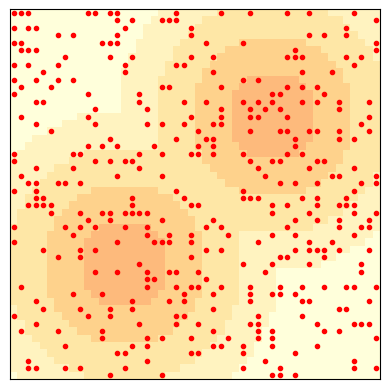

In [35]:
env = Sugarscape(50, num_agents=400)
env.draw()

The distribution of vision is uniform from 1 to 6.

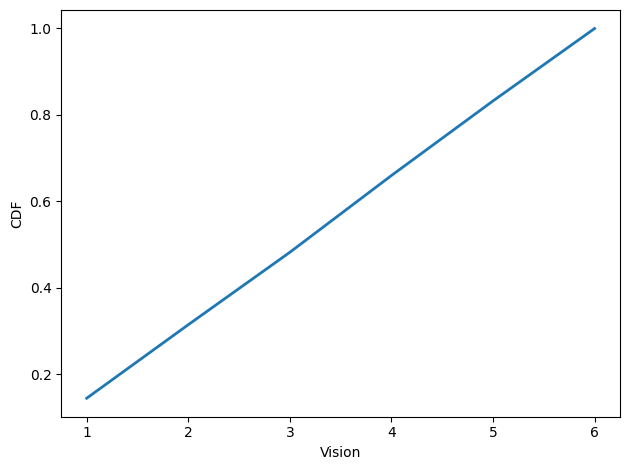

In [36]:
from empiricaldist import Cdf

cdf = Cdf.from_seq(agent.vision for agent in env.agents)
cdf.plot()
decorate(xlabel='Vision', ylabel='CDF')

The distribution of metabolism is uniform from 1 to 4.

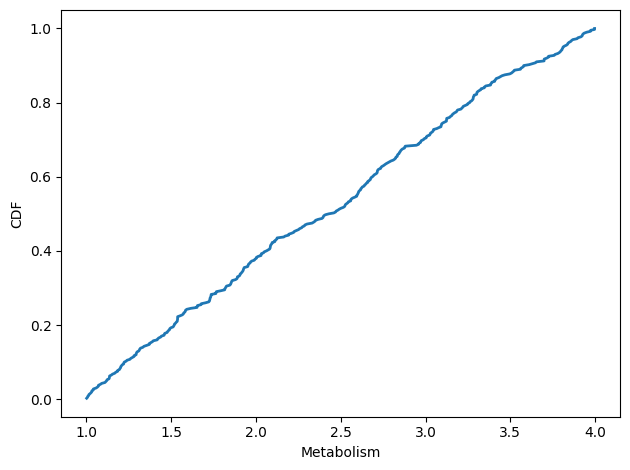

In [37]:
cdf = Cdf.from_seq(agent.metabolism for agent in env.agents)
cdf.plot()
decorate(xlabel='Metabolism', ylabel='CDF')

The distribution of initial endowment of sugar is uniform from 5 to 25.

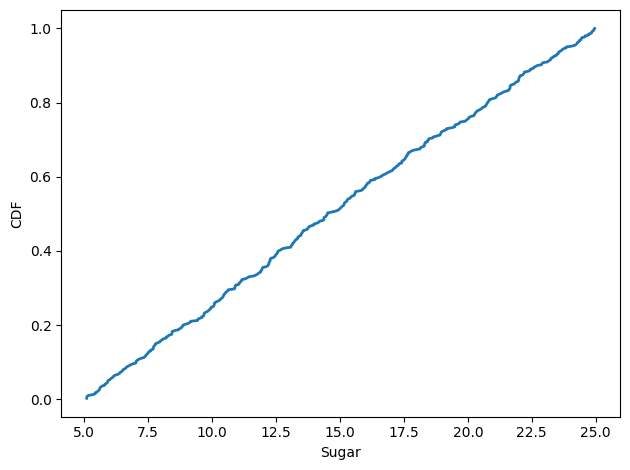

In [38]:
cdf = Cdf.from_seq(agent.sugar for agent in env.agents)
cdf.plot()
decorate(xlabel='Sugar', ylabel='CDF')

In [39]:
env.step()

400

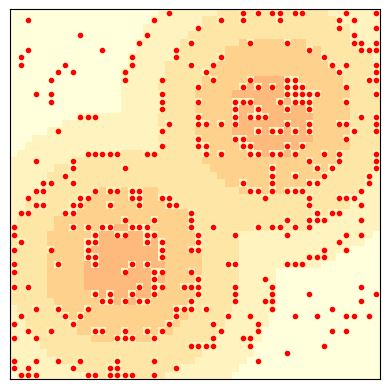

In [40]:
env.draw()

Here's what the animation looks like.

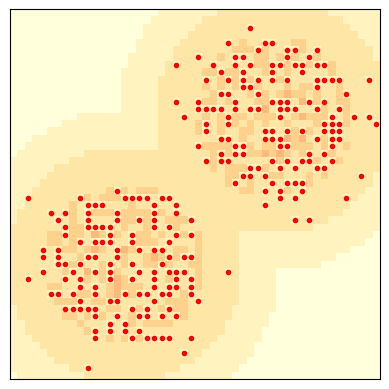

In [41]:
env.animate(frames=50)

The number of agents levels off at the "carrying capacity":

In [42]:
len(env.agents)

268

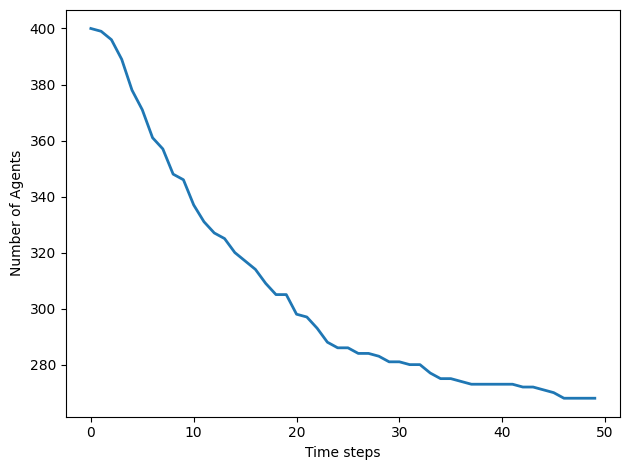

In [43]:
plt.plot(env.agent_count_seq)
decorate(xlabel='Time steps', ylabel='Number of Agents')

This figure shows the state of the system after 2 and 10 steps.

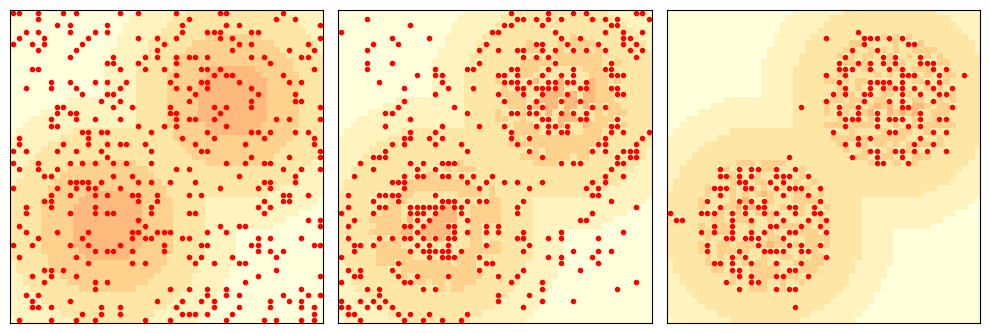

In [44]:
env = Sugarscape(50, num_agents=400)
three_frame(env, [0, 2, 98])

# Sugarscape with finite lifespans

Now we start with 250 agents, with lifetimes from 60 to 100, and replacement.

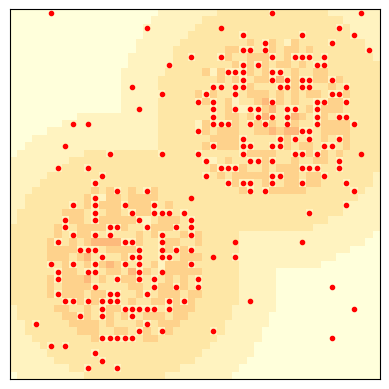

In [45]:
env = Sugarscape(50,
                 num_agents=250,
                 min_lifespan=60,
                 max_lifespan=100,
                 replace=True)

env.animate(frames=100)

After 100 time steps, the distribution of wealth is skewed to the right.  Most agents have very little sugar, but a few have a lot.

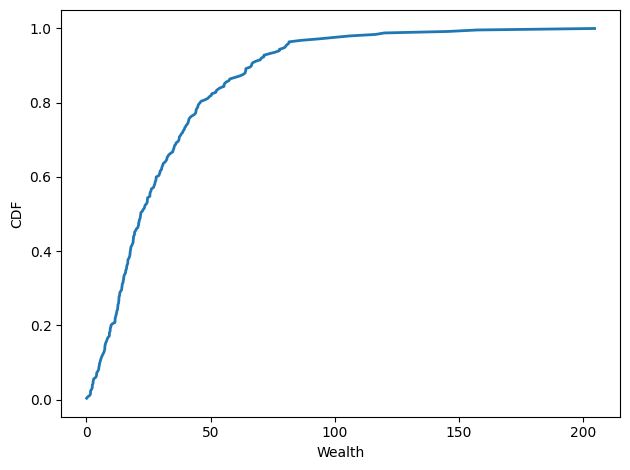

In [ ]:
cdf = Cdf.from_seq(agent.sugar for agent in env.agents)
cdf.plot()
decorate(xlabel='Wealth', ylabel='CDF')

In [ ]:
cdf.quantile([0.25, 0.50, 0.75, 0.90])

array([12.69361219, 21.89003621, 41.20743176, 66.50704033])

Starting with the same parameters, I'll run the model 500 steps, recording the distribution of wealth after each 100 steps:

In [ ]:
np.random.seed(17)

env = Sugarscape(50, num_agents=250,
                 min_lifespan=60, max_lifespan=100,
                 replace=True)

cdf = Cdf.from_seq(agent.sugar for agent in env.agents)
cdfs = [cdf]
for i in range(5):
    env.loop(100)
    cdf = Cdf.from_seq(agent.sugar for agent in env.agents)
    cdfs.append(cdf)

After about 200 steps, the distribution is stationary (doesn't change over time).

On a log scale, it is approximately normal, possibly with a truncated right tail.

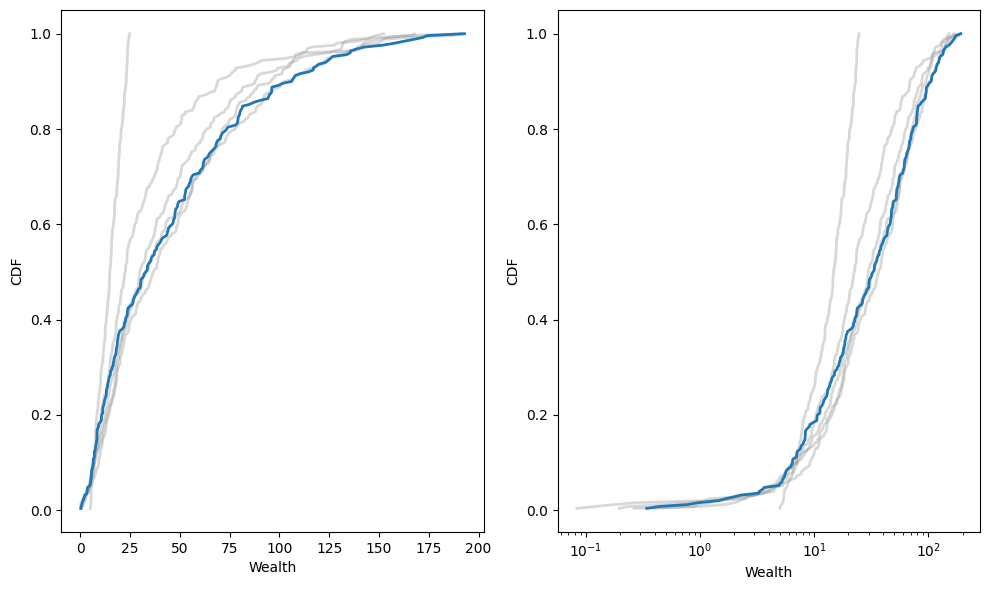

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

def plot_cdfs(cdfs, **options):
    for cdf in cdfs:
        cdf.plot(**options)

plot_cdfs(cdfs[:-1], color='gray', alpha=0.3)
plot_cdfs(cdfs[-1:], color='C0')
decorate(xlabel='Wealth', ylabel='CDF')

plt.subplot(1, 2, 2)
plot_cdfs(cdfs[:-1], color='gray', alpha=0.3)
plot_cdfs(cdfs[-1:], color='C0')
decorate(xlabel='Wealth', ylabel='CDF', xscale='log')


# Migration in waves

If we start with all agents in the lower left, they propagate up and to the right in waves.

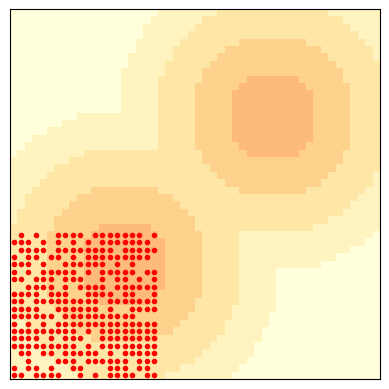

In [ ]:
np.random.seed(17)

env = Sugarscape(50,
                 num_agents=300,
                 starting_box=(20, 20),
                 max_vision=16)

env.draw()

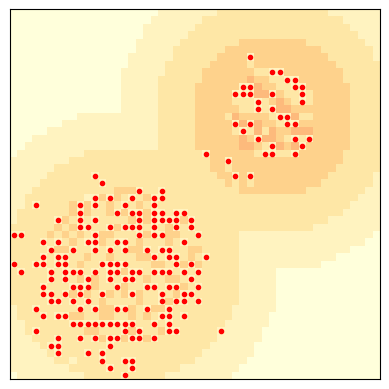

In [ ]:
env.animate(frames=20, interval=0.4)

Here's what it looks like after 6 and 12 steps.

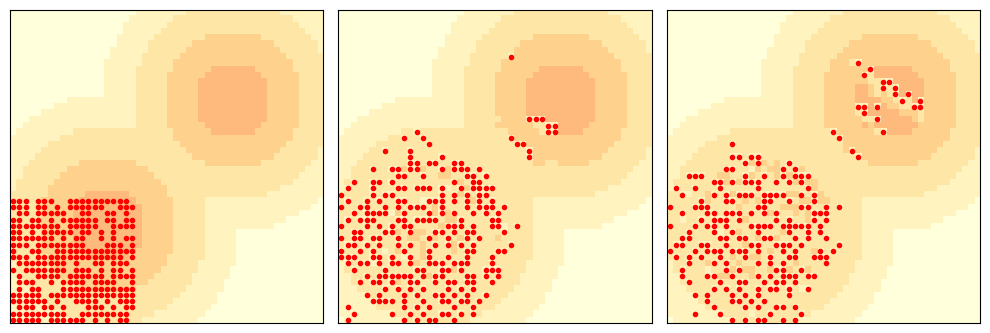

In [ ]:
env = Sugarscape(50, num_agents=300, starting_box=(20, 20), max_vision=16)
three_frame(env, [0, 6, 6])

This example is interesting because the waves move diagonally, unlike the agents, who can only move up or to the right.  They are similar in some ways to gliders and other Game of Life spaceships.

# Exercise

In the first version of SugarScape implementation, we never add agents, so once the population falls, it never recovers. In the second version of SugarScape implementation, we only replace agents when they die, so the population is constant. What happens if we add some “population pressure”.

Write a version of SugarScape that **adds a new agent at the end of every step. **Add code to **compute the average vision and the average metabolism of the agents at the end of each step**.

Run the model for a few hundred steps and plot the population over time, as well as the average vision and average metabolism.

You should be able to implement this model by inheriting from SugarScape and overriding `__init__ `and `step`.

In [47]:
# Solution

class EvoSugarscape(Sugarscape):
    """Represents an Epstein-Axtell Sugarscape."""

    def __init__(self, n, **params):
        """Initializes the attributes.

        n: number of rows and columns
        params: dictionary of parameters
        """
        Sugarscape.__init__(self, n, **params)

        # track variables
        self.avg_vision_seq = []
        self.avg_metabolism_seq = []

    def step(self):
        """Executes one time step."""
        Sugarscape.step(self)

        # average vision
        avg_vision = np.mean([agent.vision for agent in self.agents])
        self.avg_vision_seq.append(avg_vision)

        # average metabolism
        avg_metabolism = np.mean([agent.metabolism for agent in self.agents])
        self.avg_metabolism_seq.append(avg_metabolism)

        # add an agent
        add_agents = self.params.get('add_agents', False)
        if add_agents:
            self.add_agent()

        return len(self.agents)

In [48]:
# Solution

# Starting with the original model, which does not add agents, and `n=300`

np.random.seed(17)

env = EvoSugarscape(50, num_agents=300)
env.loop(300)

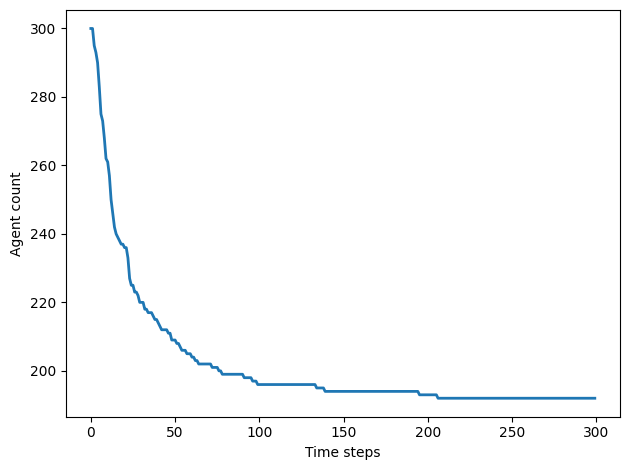

In [49]:
# Solution

# As we saw before, the number of agents drops to the "carrying capacity"

plt.plot(env.agent_count_seq)
decorate(xlabel='Time steps', ylabel='Agent count')

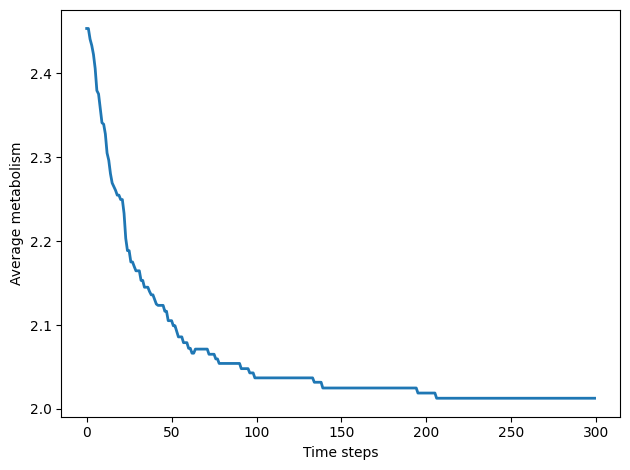

In [50]:
# Solution

# Agents with high metabolism die off quickly, so the average drops quickly.

plt.plot(env.avg_metabolism_seq)
decorate(xlabel='Time steps', ylabel='Average metabolism')

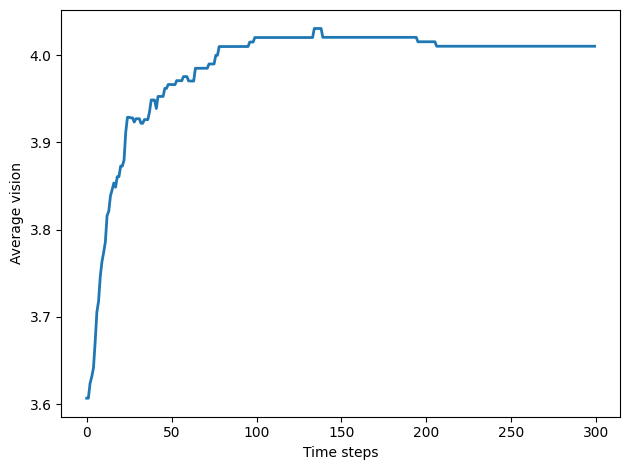

In [51]:
# Solution

# Agents with poor vision also die quickly, so the average vision increases.

plt.plot(env.avg_vision_seq)
decorate(xlabel='Time steps', ylabel='Average vision')

In [52]:
# Solution

# Now let's run it again with `add_agents=True`:

np.random.seed(17)

env = EvoSugarscape(50, num_agents=300, add_agents=True)
env.loop(300)

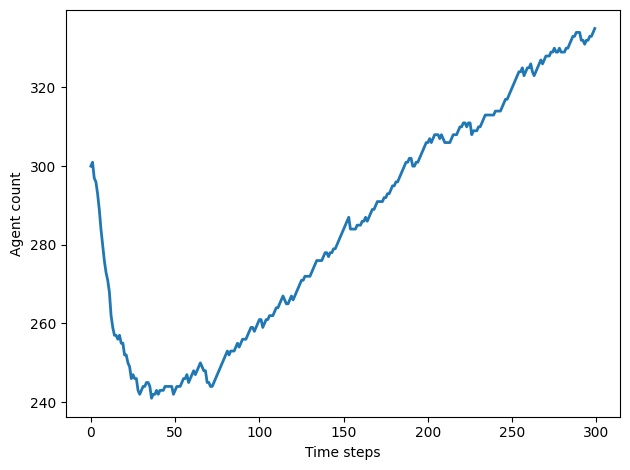

In [53]:
# Solution

# Now the initial population dies off, but then rebounds.

# Part of the reason for the increase is that the fitness
# of the agents increases, which increases the carrying capacity.

# But it is also posssible that the initial die-off overshoots
# the actual carrying capacity.

plt.plot(env.agent_count_seq)
decorate(xlabel='Time steps', ylabel='Agent count')

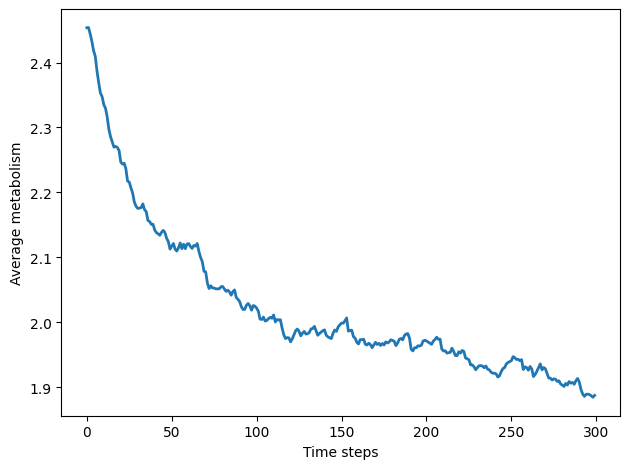

In [54]:
# Solution

# As we saw before, metabolism drops quickly during the initial die-off,
# but now it continues to fall as new agents are born and the least fit die off.

plt.plot(env.avg_metabolism_seq)
decorate(xlabel='Time steps', ylabel='Average metabolism')

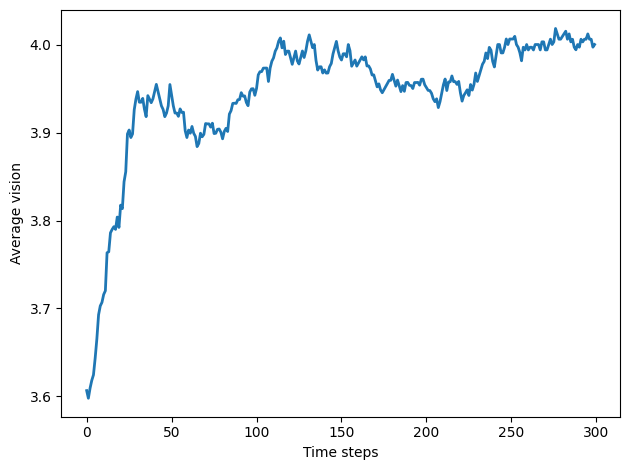

In [55]:
# Solution

# Average vision increases quickly and then levels off.

plt.plot(env.avg_vision_seq)
decorate(xlabel='Time steps', ylabel='Average vision')